# Apache Sedona

**Apache Sedona (formerly known as GeoSpark) is a cluster computing system for processing large-scale spatial data**. Sedona extends existing cluster computing systems, such as Apache Spark and Apache Flink, with a set of out-of-the-box distributed Spatial Datasets and Spatial SQL that efficiently load, process, and analyze large-scale spatial data across machines.

You may say we already have `GeoPandas`, why we need Sedona. GeoPandas is greate when your dataset is small (< 2 GB), it can't host large dataset.

The official Sedona site is [here](https://sedona.apache.org)

Sedona can be connected with various computational framework:
- spark
- flink
- snowflake

> In this tutorial, we only focus on how to use sedona in spark

## 1. What Sedona offers?

- Distributed spatial datasets
   * Spatial RDD on Spark
   * Spatial DataFrame/SQL on Spark
   * Spatial DataStream on Flink
   * Spatial Table/SQL on Flink

- Complex spatial objects
   * Vector geometries / trajectories
   * Raster images with Map Algebra
   * Various input formats: CSV, TSV, WKT, WKB, GeoJSON, Shapefile, GeoTIFF, NetCDF/HDF

- Distributed spatial queries
   * Spatial query: range query, range join query, distance join query, K Nearest Neighbor query
   * Spatial index: R-Tree, Quad-Tree

- Rich spatial analytics tools¶
   * Coordinate Reference System / Spatial Reference System Transformation
   * High resolution map generation: Visualize Spatial DataFrame/RDD
   * Apache Zeppelin integration
   * Support Scala, Java, Python, R


## 2. Install and configure Sedona
When Sedona works on top of a `Spark cluster`, and it provides the below languages as API:
- Scala/Java
- Python
- R

> In this tutorial, I only show how to install it on Spark with Scala and Python API.

For more details, you can visit the official [doc](https://sedona.apache.org/latest/)

### 2.1 Get the Sedona jar file

You can find all Sedona release jar file in the [maven central repo](https://mvnrepository.com/artifact/org.apache.sedona?p=1).

#### Use shaded jar files

To facilitate the installation, Sedona provides `shaded jars` (We only need to import two jars files).

Below is a general form

 - **x.x**: is the spark version which the sedona jar is compatible with, 
 - **y.y**: is the scala version which spark is compile with.
  - **z.z.z**: is the version of sedona, (for geotools-wrapper, it's sedona version which the wrapper compatible with)
    - **a.a**: is the version of geotools
```xml
<dependencies>
<dependency>
  <groupId>org.apache.sedona</groupId>
  <artifactId>sedona-spark-shaded-x.x_y.y</artifactId>
  <version>z.z.z</version>
</dependency>
<dependency>
  <groupId>org.apache.sedona</groupId>
  <artifactId>sedona-viz-x.x_y.y</artifactId>
  <version>1.4.1</version>
</dependency>
<!-- Optional: https://mvnrepository.com/artifact/org.datasyslab/geotools-wrapper -->
<dependency>
    <groupId>org.datasyslab</groupId>
    <artifactId>geotools-wrapper</artifactId>
    <version>z.z.z-a.a</version>
</dependency>
</dependencies>
```

For example, in below maven configuration, 
  - The compatible spark version: `3.5`
  - The scala version of the spark: `2.13`
  - The sedona version: `1.6.1`
  - The geotools version: `28.2`

```xml
<dependencies>
<dependency>
  <groupId>org.apache.sedona</groupId>
  <artifactId>sedona-spark-shaded-3.5_2.13</artifactId>
  <version>1.6.1</version>
</dependency>
<dependency>
  <groupId>org.apache.sedona</groupId>
  <artifactId>sedona-viz-3.5_2.13</artifactId>
  <version>1.6.1</version>
</dependency>
<!-- Optional: https://mvnrepository.com/artifact/org.datasyslab/geotools-wrapper -->
<dependency>
    <groupId>org.datasyslab</groupId>
    <artifactId>geotools-wrapper</artifactId>
    <version>1.6.1-28.2</version>
</dependency>
</dependencies>
```

The optional **GeoTools library** is required if you want to use `CRS transformation, ShapefileReader or GeoTiff reader`. This wrapper library is a re-distribution of GeoTools official jars.

> For other spark env, you can find the full doc [here](https://sedona.apache.org/1.4.1/setup/maven-coordinates/)


#### Use unshaded jars

If you use unshaded jars, your mvn config file will become longer. We don't recommend here.

> You can visit the official installation [doc](https://sedona.apache.org/latest/setup/overview/) for more details.

## 3. Use sedona in pyspark

You can find the official sedona pyspark installation doc [here](https://sedona.apache.org/latest/setup/install-python/).

To use sedona in pyspark we need to follow the below steps:
- Install a `python virtual environments`.
- Install `apache-sedona[spark]` in the target python virtual environments
- Download the required jars(check the version dependencies) for offline usage.
- Create the spark session with the required jar files


### 3.1 Install apache-sedona python package

The official package page is [here](https://pypi.org/project/apache-sedona/). You can use below command to install the package

```shell
# simple install
pip install apache-sedona

# install sedona with pyspark as dependency
# Since Sedona v1.1.0, pyspark is an optional dependency of Sedona Python because spark comes pre-installed on many spark platforms. 
# To install pyspark along with Sedona Python in one go, use the spark extra
pip install apache-sedona[spark]

# you need to check the version of apacke-sedona, because the jar version must be compatible 
pip show apache-sedona
```

> for example, if the python package version apache-sedona is 1.6.1, then the jar version must be 1.6.1 too.


### 3.2 Download the required jars

Before download, determine the right jar version is very important. You can find all required jar in the below urls:
 - sedona-jars: https://repo.maven.apache.org/maven2/org/apache/sedona/
 - geotools-wrapper-jars: https://repo.maven.apache.org/maven2/org/datasyslab/geotools-wrapper/

I will show two examples of the shaded jar:
  - `sedona-spark-shaded-3.0_2.12-1.4.1.jar`: this jar is built for spark 3.0 compile with scala 2.12. The sedona version is 1.4.1
  - `sedona-spark-shaded-3.5_2.13-1.6.1.jar`: this jar is built for spark 3.5 compile with scala 2.13. The sedona version is 1.6.1
  
For the geotools jar:
  - `geotools-wrapper-1.4.0-28.2.jar`: this jar is built for sedona version 1.4.0, the geotools version is 28.2
  - `geotools-wrapper-1.6.1-28.2.jar`: this jar is built for sedona version 1.6.1, the geotools version is 28.2 

### 3.3 Create the spark session with the required jar file

Import the sedona Jar files into your spark session. (Create sedona config)

There are two ways to import Jar files into your spark session.

1. Put the jar files directly into the $SPARK_HOME/jars/ (In cluster mode, make sure all the worker nodes also have the jar file in place)
2. Ask spark session to download the jar file by using the `spark.jars.packages` config

Check the below example

In [1]:
from sedona.spark import *
from pathlib import Path

# import sedona constructor function, often used to build geometry type column from native data type 
from sedona.sql import st_constructors as stc

# import sedona simple function, often used to do geometry calculation such as ST_Distance, 
from sedona.sql import st_functions as stf

# import sedona predicates function, often used to determine relation between two geometry column such as ST_Contains
from sedona.sql import st_predicates as stp
# import sedona aggregates function,
from sedona.sql import st_aggregates

In [2]:
# build a sedona session offline
project_root_dir = Path.cwd().parent.parent



In [3]:
jar_folder = Path(f"{project_root_dir}/jars/sedona-35-213-161")
jar_list = [str(jar) for jar in jar_folder.iterdir() if jar.is_file()]
jar_path = ",".join(jar_list)

# build a sedona session (sedona = 1.6.1) offline
config = SedonaContext.builder() \
    .master("local[*]") \
    .config('spark.jars', jar_path). \
    getOrCreate()


If you don't want to download the jar directly, you can use the below code to add jar on the fly.

In [3]:
# build a sedona session online,
# 
# config = SedonaContext.builder(). \
#     config('spark.jars.packages',
#            'org.apache.sedona:sedona-spark-3.5_2.13:1.6.1,'
#            'org.datasyslab:geotools-wrapper:1.6.1-28.2'). \
#     config('spark.jars.repositories', 'https://artifacts.unidata.ucar.edu/repository/unidata-all'). \
# getOrCreate()

In [4]:
# create a sedona context
sedona = SedonaContext.create(config)

In [5]:
# get the spark context
sc = sedona.sparkContext

# use utf as default encoding
sc.setSystemProperty("sedona.global.charset", "utf8")

## 3.4 Read shape file with sedona

In [6]:
data_dir = f"{project_root_dir}/data"
airports_file_path = f"{data_dir}/shapefile/airports_shape"
countries_file_path = f"{data_dir}/shapefile/countries_shape"

In [7]:
# read countries shape file
countries = ShapefileReader.readToGeometryRDD(sc, countries_file_path)
countries_df = Adapter.toDf(countries, sedona)
countries_df.createOrReplaceTempView("country")
countries_df.printSchema()

root
 |-- geometry: geometry (nullable = true)
 |-- featurecla: string (nullable = true)
 |-- scalerank: string (nullable = true)
 |-- LABELRANK: string (nullable = true)
 |-- SOVEREIGNT: string (nullable = true)
 |-- SOV_A3: string (nullable = true)
 |-- ADM0_DIF: string (nullable = true)
 |-- LEVEL: string (nullable = true)
 |-- TYPE: string (nullable = true)
 |-- ADMIN: string (nullable = true)
 |-- ADM0_A3: string (nullable = true)
 |-- GEOU_DIF: string (nullable = true)
 |-- GEOUNIT: string (nullable = true)
 |-- GU_A3: string (nullable = true)
 |-- SU_DIF: string (nullable = true)
 |-- SUBUNIT: string (nullable = true)
 |-- SU_A3: string (nullable = true)
 |-- BRK_DIFF: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- NAME_LONG: string (nullable = true)
 |-- BRK_A3: string (nullable = true)
 |-- BRK_NAME: string (nullable = true)
 |-- BRK_GROUP: string (nullable = true)
 |-- ABBREV: string (nullable = true)
 |-- POSTAL: string (nullable = true)
 |-- FORMAL_EN: st

In [8]:
countries_df.show(5)

+--------------------+---------------+---------+---------+--------------------+------+--------+-----+-----------------+--------------------+-------+--------+--------------------+-----+------+--------------------+-----+--------+--------------------+--------------------+------+--------------------+-----------------+-------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+---------+---------+----------+----------+--------+-----------+--------+----------+--------+--------------------+--------------------+---------+--------+------+------+---------+------+-----+-----+-----+--------+---------+--------------------+----------+----------+----------+----------+--------------------+--------------------+--------------------+--------------------+--------+--------+----------+----+--------+--------+---------+---------+----------+----------+--------------------+--------------------+-------

In [9]:
# read airports shape file
airports = ShapefileReader.readToGeometryRDD(sc, airports_file_path)
airports_df = Adapter.toDf(airports, sedona)
airports_df.createOrReplaceTempView("airport")
airports_df.printSchema()

root
 |-- geometry: geometry (nullable = true)
 |-- scalerank: string (nullable = true)
 |-- featurecla: string (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- abbrev: string (nullable = true)
 |-- location: string (nullable = true)
 |-- gps_code: string (nullable = true)
 |-- iata_code: string (nullable = true)
 |-- wikipedia: string (nullable = true)
 |-- natlscale: string (nullable = true)



## 3.5 Use sedona geo function 

In this example, we join the country data frame and airport data frame by using the condition ST_Contains(c.geometry, a.geometry). It means if the airport (point) in the country (polygon), then we show the row.

In [10]:
# create a new dataframe to host the result of the join
countries_airport_df = sedona.sql("SELECT c.geometry as country_location, c.NAME_EN as country_name, a.geometry as airport_location, a.name as airport_name FROM country c, airport a WHERE ST_Contains(c.geometry, a.geometry)")
countries_airport_df.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
countries_airport_df.printSchema()

root
 |-- country_location: geometry (nullable = true)
 |-- country_name: string (nullable = true)
 |-- airport_location: geometry (nullable = true)
 |-- airport_name: string (nullable = true)



In [12]:
# create a new view to store the result of the geo join
countries_airport_df.createOrReplaceTempView("country_airport")

In [20]:
airports_count=sedona.sql("SELECT c.country_name, c.country_location, count(*) as airport_count FROM country_airport c GROUP BY c.country_name, c.country_location sort by airport_count desc")
airports_count.show(5)

+--------------------+--------------------+-------------+
|        country_name|    country_location|airport_count|
+--------------------+--------------------+-------------+
|United States of ...|MULTIPOLYGON (((-...|           35|
|Canada           ...|MULTIPOLYGON (((-...|           15|
|Mexico           ...|MULTIPOLYGON (((-...|           12|
|Brazil           ...|MULTIPOLYGON (((-...|           12|
|People's Republic...|MULTIPOLYGON (((1...|            7|
+--------------------+--------------------+-------------+
only showing top 5 rows



In [14]:
france_airports = sedona.sql("SELECT c.country_name, c.airport_name,c.airport_location FROM country_airport c WHERE c.country_name LIKE '%France%'")
france_airports.show(5,truncate=False)

+--------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+
|country_name                                |airport_name                                                                                                                                                                                            |airport_location                            |
+--------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+
|France                                      |Charles de Gaulle Int'l                                                    

In [15]:
france_airports.printSchema()

root
 |-- country_name: string (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- airport_location: geometry (nullable = true)



In [16]:
out_path = f"{data_dir}/tmp/france.parquet"
france_airports.write.mode("overwrite").format("geoparquet").save(out_path)

In [17]:
tmp_df = sedona.read.format("geoparquet").load(out_path)
tmp_df.show(5,truncate=False)

+--------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+
|country_name                                |airport_name                                                                                                                                                                                            |airport_location                            |
+--------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+
|France                                      |Charles de Gaulle Int'l                                                    

In [18]:
tmp_df.printSchema()

root
 |-- country_name: string (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- airport_location: geometry (nullable = true)



## 4. Visualize the data

Sedona provides two api to visualize geospatial data directly.
- pydeck: https://pypi.org/project/pydeck/
- keplergl: https://pypi.org/project/keplergl/


We can also easily convert the sedona dataframe to geopandas dataframe. Then all tools which can visualize geopandas dataframe can be used as well.
In this tutorial, we only show two examples:
- matplotlib
- folium

### 4.1 Generate map for pydeck

In [ ]:
pydeck_map_path = f"{data_dir}/tmp/pydeck_map.html"

sedona_pydeck_map = SedonaPyDeck.create_choropleth_map(
    df=airports_count, plot_col="airport_count",
)

sedona_pydeck_map.to_html(pydeck_map_path)

### 4.2 Generate map for keplergl

In [36]:
kepler_map_path = f"{data_dir}/tmp/kepler_map.html"

sedona_kepler_map = SedonaKepler.create_map(df=airports_count,name="airports_count")

sedona_kepler_map.save_to_html(file_name=kepler_map_path)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to C:\Users\PLIU\Documents\git\GeoParquetAndSedona/data/tmp/kepler_map.html!


In [26]:
import geopandas as gpd

airports_count_pdf = airports_count.toPandas()
gpdf=gpd.GeoDataFrame(airports_count_pdf,geometry="country_location",crs="EPSG:4326")

### 4.3 Visualize the airport count per country with matplotlib

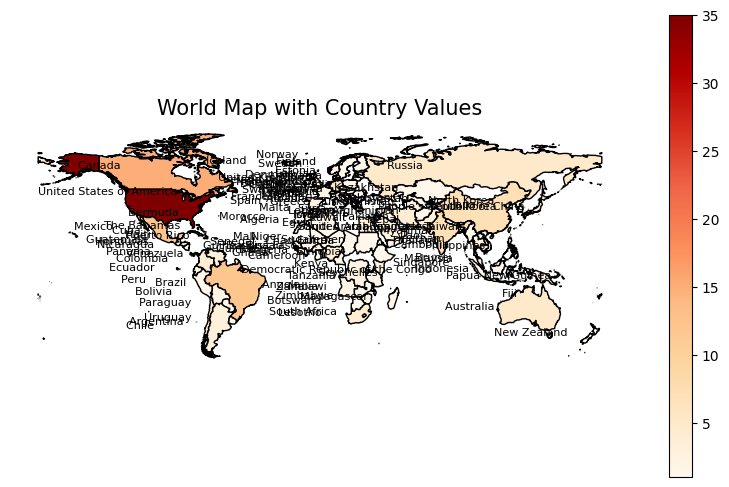

In [27]:
import matplotlib.pyplot as plt

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the GeoDataFrame
gpdf.plot(
    column="airport_count",  # The column to visualize
    cmap="OrRd",  # Color map
    legend=True,  # Add a legend
    edgecolor="black",  # Outline color
    ax=ax,  # Axis to plot on
)

# Add country labels
for _, row in gpdf.iterrows():
    # Get the centroid of each country
    x, y = row["country_location"].centroid.coords[0]
    ax.text(x, y, row["country_name"], fontsize=8, ha="center")

# Title and axis
ax.set_title("World Map with Country Values", fontsize=15)
ax.set_axis_off()  # Turn off the axis

plt.show()

### 4.4 Visualize the airport count per country with folium

In [28]:
import folium
from folium import Choropleth

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")

# Add GeoJSON to the map
folium.Choropleth(
    geo_data=gpdf,  # GeoDataFrame
    name="choropleth",
    data=gpdf,  # Data source
    columns=["country_name", "airport_count"],  # Columns for the key and values
    key_on="feature.properties.country_name",  # Match the GeoJSON "properties" key
    fill_color="YlGnBu",  # Color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="airport_count",
).add_to(m)

# Add labels to each country
for _, row in gpdf.iterrows():
    # Get the centroid of each country shape for label placement
    centroid = row["country_location"].centroid
    folium.Marker(
        [centroid.y, centroid.x],
        popup=f"{row['country_name']}: {row['airport_count']}",
    ).add_to(m)

In [30]:
m.save(f"{data_dir}/tmp/interactive_map.html")